# IEFI Lautaro Santos Da Silveira

En el siguiente trabajo, se propone el desafío de identificar si una noticia es o no una Fake News. 
Para tomar esa decisión primero se deberá aplicar herramientas de Procesamiento del Lenguaje Natural (NLP), y luego se procederá a a la eleccion del modelo que mejor aprenda. Se contará con modelos de SVM, RandomForest, Arbol de desicion y Regresion Logistica.

### Librerias

In [55]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk import regexp_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
!python -m spacy download es_core_news_sm
import spacy
nlp= spacy.load('es_core_news_sm')
import re
from collections  import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from  wordcloud import WordCloud
import  matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ---------------------------------------- 12.9/12.9 MB 3.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


### Set de datos

In [72]:
#df= pd.read_excel(r'D:\Escritorio\IES21\4to cuatrimestre\PLN\Noticias Verdaderas y Falsas.xlsx')
df= pd.read_excel(r'C:\Users\Usuario\Desktop\lautaro\ies 21\IES21\4to cuatrimestre\PLN\Noticias Verdaderas y Falsas.xlsx')
df=shuffle(df, random_state=123)

Divido mi Set de Datos en dos, generando uno que serán los casos que tengo conocimiento historico, perteneciente a df_conocido, y otro que no tendrán la clasificacion, los cuales se utilizarán en un futuro para la predicción.

In [85]:
df_conocido, df_desconocido= train_test_split(df,test_size=0.2,random_state=123)

In [12]:
df_Testeo = df_desconocido.drop('class',axis=1)

### Funcion de preprocesamiento

In [86]:
stops= set(stopwords.words('spanish'))
def preprocesamiento(documento):
# Eliminación de valores numéricos
  documento = re.sub('\d', ' ', documento)
  documento = documento.lower()
############################## TOKENIZAR ##############################
# Tokenizo con una List Comprehension, y luego a esta le filtro las stopwords
  tokenizado = [token for token in regexp_tokenize(documento, pattern='\w+')]
  filtro = [filtro for filtro in tokenizado if filtro not in stops]
############################## LEMATIZAR ##############################
# Spacy tiene su propio tokenizador 
  doc= nlp(documento)
# Lematizo al texto, para eliminár los signos de puntuación o demas signos que no me aportarán al análisis, se filtrarán los tokens
# que están en la anterior List Comprehension llamada filtro
  lemma = [lema.lemma_ for lema in doc if str(lema) in filtro]
  Procesada=" ".join(map(str, lemma))
  return Procesada

In [87]:
pre_procesamiento=df_conocido['Text'].apply(preprocesamiento)
pre_procesamiento

1385    matar madre descuartizar aún carne caliente co...
1656    tras cerrar varios hilo abierto juegodetrono h...
1060    candidata socialista presidencia rioja conchab...
1478    pese ser animal doméstico excelencia españa ge...
1931    aramco empresa rentable planeta lanzar domingo...
                              ...                        
345     arabio saudito acabar cortar él cabeza esra ll...
1161    maternidad frustrado españolasparda montar dec...
268     agente policía guardia civil trabajar programa...
1818    acción buen buen forzar reacción violento inde...
1958    ex cuñada josé enrique abuín gey alias chicle ...
Name: Text, Length: 1600, dtype: object

In [88]:
df_conocido['Text_proceso']= pre_procesamiento
df_conocido=df_conocido.reset_index()
df_conocido.drop(['index','Text'],axis=1,inplace=True)

In [89]:
df_conocido

,class,Text_proceso
0,False,matar madre descuartizar aún carne caliente co...
1,True,tras cerrar varios hilo abierto juegodetrono h...
2,True,candidata socialista presidencia rioja conchab...
3,False,pese ser animal doméstico excelencia españa ge...
4,True,aramco empresa rentable planeta lanzar domingo...
...,...,...
1595,False,arabio saudito acabar cortar él cabeza esra ll...
1596,True,maternidad frustrado españolasparda montar dec...
1597,False,agente policía guardia civil trabajar programa...
1598,False,acción buen buen forzar reacción violento inde...


In [90]:
vectorizer = TfidfVectorizer()
vectores = vectorizer.fit_transform(df_conocido['Text_proceso']).toarray()
nombres= vectorizer.get_feature_names_out()
df_vector= pd.DataFrame(vectores,columns=nombres )
df_vector


,abalanzar,abandonado,abandonar,abandono,abascal,abasccal,abateír,abatir,abc,abcel,...,órbita,órgano,óscar,últimamente,último,único,útil,сото,тара,те
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.216389,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [91]:
df_vector['class']=df_conocido['class']
df_vector

,abalanzar,abandonado,abandonar,abandono,abascal,abasccal,abateír,abatir,abc,abcel,...,órgano,óscar,últimamente,último,único,útil,сото,тара,те,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,True
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.216389,0.0,0.0,0.0,0.0,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,False
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,True
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,False
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,False


### Graficos

Palabras de noticias verdaderas

In [92]:
verdaderas= df_conocido.loc[df_conocido['class']==True]

In [97]:
verdaderas['Text_proceso'][1]

'tras cerrar varios hilo abierto juegodetrono hbo trabajar nuevo producción derivado'

In [103]:
string

'ex cuñada josé enrique abuín gey alias chicle hermana gemelar ex mujer ratificar miércoles denuncia presentar hacer año menor edad violó denuncia agresión sexual presentar año'

In [82]:
verdaderas.loc[:1]

,abalanzar,abandonado,abandonar,abandono,abascal,abasccal,abateír,abatir,abc,abcel,...,órgano,óscar,últimamente,último,único,útil,сото,тара,те,class
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [60]:
wc = WordCloud(background_color = "black",colormap = "hsv", max_font_size = 150, random_state = 123).generate(verdaderas.columns)

TypeError: expected string or bytes-like object

ValueError: WordCloud has not been calculated, call generate first.

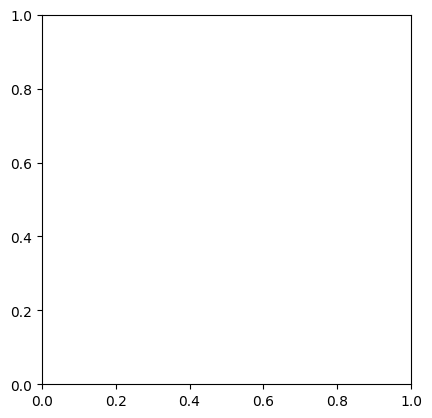

In [59]:

plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

# Mostramos las nubes de palabras resultantes.
plt.show()

### Modelos de ML

In [11]:
x= df_vector.drop('class',axis=1)
y= df_vector['class']

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=123)

### Modelos

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Creamos los folds externos
skfold_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Creamos los folds internos
skfold_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

#### SVM

In [16]:
# Instanciamos el estimador
svc= SVC(random_state=123)

# Creamos la grilla de hiperparametros a probar
param_grid_svc = [{'C':[0.0001,0.01,0.1,1], 'gamma':['scale','auto']}]

# Creamos el inner CV (GSCV para buscar los mejores hiperparámetros con los k folds internos)
gscv_svc = GridSearchCV(estimator=svc,
                    param_grid=param_grid_svc, 
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=skfold_inner,
                    verbose=0,
                    refit=True)

# Ahora creamos el outer CV para evaluar el inner CV para cada fold externo
# Recordar que cross_val_score/cross_validate realiza el .fit y .predict internamente
# Tener en cuenta que el .predict lo realiza sobre el modelo que tuvo mejores resultados en el entrenamiento (gscv_knn.best_estimator_)
nested_cv_svc = cross_validate(gscv_svc, X=x, y=y, cv=skfold_outer, return_train_score=True)

result_cv_svc = pd.DataFrame(nested_cv_svc)
result_cv_svc

,fit_time,score_time,test_score,train_score
0,291.746396,7.006354,0.7600,0.999375
1,291.921990,5.492438,0.7825,1.000000
2,292.024044,7.484832,0.7575,0.999375
3,301.853389,6.610027,0.8150,1.000000
4,297.969480,6.132643,0.8275,1.000000


#### Random Forest

In [17]:
# Instanciamos el estimador
random= RandomForestClassifier(random_state=123)

# Creamos la grilla de hiperparametros a probar
param_grid_random = [{'n_estimators':[35,40,45], 'criterion':['gini','entropy'], 'max_depth':[35,40,45]}]

# Creamos el inner CV (GSCV para buscar los mejores hiperparámetros con los k folds internos)
gscv_random = GridSearchCV(estimator=random,
                    param_grid=param_grid_random, 
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=skfold_inner,
                    verbose=0,
                    refit=True)

# Ahora creamos el outer CV para evaluar el inner CV para cada fold externo
# Recordar que cross_val_score/cross_validate realiza el .fit y .predict internamente
# Tener en cuenta que el .predict lo realiza sobre el modelo que tuvo mejores resultados en el entrenamiento (gscv_knn.best_estimator_)
nested_cv_random = cross_validate(gscv_random, X=x, y=y, cv=skfold_outer, return_train_score=True)

result_cv_random = pd.DataFrame(nested_cv_random)
result_cv_random

,fit_time,score_time,test_score,train_score
0,277.843181,0.140961,0.6600,0.966875
1,302.731781,0.462003,0.7100,0.964375
2,312.566763,0.154132,0.6600,0.972500
3,322.571785,0.173002,0.7200,0.953125
4,290.410132,0.627398,0.7025,0.966875


#### Regresion Logistica

In [18]:
# Instanciamos el estimador
RL= LogisticRegression(random_state=123)

# Creamos la grilla de hiperparametros a probar
param_grid_RL = [{'C':[0.0001,0.01,0.1,1], 'penalty':['l1','l2','elasticnet','none']}]

# Creamos el inner CV (GSCV para buscar los mejores hiperparámetros con los k folds internos)
gscv_RL = GridSearchCV(estimator=RL,
                    param_grid=param_grid_RL, 
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=skfold_inner,
                    verbose=0,
                    refit=True)

# Ahora creamos el outer CV para evaluar el inner CV para cada fold externo
# Recordar que cross_val_score/cross_validate realiza el .fit y .predict internamente
# Tener en cuenta que el .predict lo realiza sobre el modelo que tuvo mejores resultados en el entrenamiento (gscv_knn.best_estimator_)
nested_cv_RL = cross_validate(gscv_RL, X=x, y=y, cv=skfold_outer, return_train_score=True)

result_cv_RL = pd.DataFrame(nested_cv_RL)
result_cv_RL

c:\Users\Usuario\Desktop\lautaro\ies 21\entorno\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\Desktop\lautaro\ies 21\entorno\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\Desktop\lautaro\ies 21\entorno\lib\site-packages\sklearn\linear_model\_logistic.py", line 1094, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Usuario\Desktop\lautaro\ies 21\entorno\lib\site-packag

,fit_time,score_time,test_score,train_score
0,16.459257,0.101009,0.7350,0.971250
1,16.120291,0.086989,0.7700,0.975000
2,14.321524,0.116996,0.7500,0.976875
3,15.849356,0.115004,0.7800,0.974375
4,14.164488,0.092011,0.8075,0.975625


#### Comparacion de modelos

In [19]:
SVC_promedio = result_cv_svc.test_score.mean()
SVC_desvio = result_cv_svc.test_score.std()

RandomForest_promedio = result_cv_random.test_score.mean()
RandomForest_desvio = result_cv_random.test_score.std()

RL_promedio = result_cv_RL.test_score.mean()
RL_desvio = result_cv_RL.test_score.std()

In [20]:
print('SVC promedio en el outer: ',SVC_promedio, " +/- ", 2*SVC_desvio, " (95%)")
print('Random Forest promedio en el outer: ',RandomForest_promedio, " +/- ", 2*RandomForest_desvio, " (95%)")
print('Regresion Logistica promedio en el outer: ',RL_promedio, " +/- ", 2*RL_desvio, " (95%)")

Arbol promedio en el outer:  0.6325000000000001  +/-  0.036228441865473554  (95%)
SVC promedio en el outer:  0.7885  +/-  0.0635019684734261  (95%)
Random Forest promedio en el outer:  0.6905  +/-  0.05705260730238359  (95%)
Regresion Logistica promedio en el outer:  0.7685000000000001  +/-  0.05585696017507578  (95%)


El mejor modelo que me dio es el de SVC, ahora procedo a la busqueda de mejores hiperparametros

In [30]:
svc= SVC(random_state=123)

# Creamos la grilla de hiperparametros a probar
param_grid_svc = [{'C':[1.25,1.3,1.35], 'gamma':['scale']}]

# Creamos el inner CV (GSCV para buscar los mejores hiperparámetros con los k folds internos)
gscv_svc = GridSearchCV(estimator=svc,
                    param_grid=param_grid_svc, 
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=skfold_inner,
                    verbose=0,
                    refit=True)

In [31]:
algoritmo_elegido = gscv_svc
algoritmo_elegido.fit(x, y)

elegido_resultados = pd.DataFrame(algoritmo_elegido.cv_results_).loc[algoritmo_elegido.best_index_]

elegido_promedio = elegido_resultados.mean_test_score
elegido_desvio = elegido_resultados.std_test_score

print('AC: ', elegido_promedio*100, " +/- ", 2*elegido_desvio*100, " (95%)")

In [ ]:
algoritmo_elegido.best_params_

{'C': 1.3, 'gamma': 'scale'}